# How Big Does Your Big Data Need To Be?

Thomas Arnold, PhD

arnoldtk@mail.uc.edu

June 11, 2021

One of the tenets of big data is that there are five Vs that are important.  These Vs are volume, velocity, variety, veracity and value. There does not seem to be a lot of research that explores the connection between these five V concepts.  The analyses shown below connect four of the five Vs.  The only V that is not involved is velocity.  

Two sets of analyses are provided.  The first set of analyses indicate how volume and veracity are related to value.  The second set of analyses show that variety is an important factor in reducing the volume of data needed to produce value.

The results indicate that for any fixed veracity, volume is nonlinearly related to value.  There is a diminishing return in value from adding volume.  The exception is when variety is added.  With maximum variety, value is linearly related to volume.

## The Connection between Volume, Veracity, and Value

The first set of analyses examine how volume and veracity are related to value.  These three Vs are operationalized as follows.

    Volume = Number of variables measured as N
    Veracity = Correlation with the outcome measured as r
    Value = Accuracy of the result measured as R Squared
    
The following analyses assess how many x variables (volume) with fixed r(x,y) (veracity) are needed to achieve a particular R Squared (value) when predicting y.  Note that these calculations initially began in SPSS and I am transitioning to Python as a learning experience.  Python also provides the ability to post to Github so that others might try this out. 

I used ordinary least squares (OLS) regression in these calculations because all of the variables were random normal.  No assumptions of the OLS regression model were violated.

I set up the regression models using randomly generated x variables that were transformed to variables correlated with y.  I chnged the prefix on the variables to r to indicate that they were correlated with y.  These correlated variables (r(x,y)) were created using the following formula for transforming a random variable x### to a r### variable correlated with y.

    r### = Y * r + x### * np.sqrt(1-r**2)

Where r### = The nth variable correlated with y
      Y = A random outcome variable
      r = The desired correlation
      x## = The nth random variable fed to the model
    
The results are shown below.  It seems clear that as volume increases for any level of veracity, the value does not increase in a linear fashion.  There is a diminishing return in terms of value for increases in volume.

## The Results of the Volume, Veracity, and Value Calculations

The following code section plots the results of the volume, veracity, and value analyes I have done so far.  The code for performing the calculations is provided later in the notebook for those who want to play around with this.

Each line represents a certain volume of data.  The volume ranges from one predictor variable to one hundred thousand predictor variables. At each volume (@N), the veracity (r value) is increased stepwise.  The value (R Squared) is displayed on the Y axis. 

### Load the Python modules

In [50]:
import pandas as pd
import numpy as np
from scipy.linalg import cholesky
from matplotlib.pyplot import scatter
import statsmodels.api as sm # import statsmodels 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import pearsonr

pd.options.mode.chained_assignment = None

### Load and Display the Saved Volumn, Veracity, and Value Data

The chart below has all of the calulations done so far.  The chart is set up so that one starts with the number of variables available in the model (N) in the first column, the correlation (r value) of the variables on the top row, and then the R Squared is displayed at the intersection between N and r. 

Try to ignore the line number if possible. For example, the R Squared for a model with N = 5 variables and r = .10 is .047.  Note that the volume, operationalized as the number of variables (N) is set up approximately logrithmically.  The count is not linear, and goes up 1, 2, 5, 10, 20, 50, 100, etc.  I will plot out a sample so it becomes clearer.

In [70]:
BigDataVVVdf = pd.read_excel('BigDataVolumeVarietyVeracity.xlsx')
BigDataVVVdf.columns = ['N/r', '0', '.05', '.10','.15','.20','.25','.30','.35','.40','.45',
                        '.50','.55','.60','.65','.70','.75','.80','.85','.90','.95','.999']
print('################################################################')
print('Table of Values = R Squared, for Volumes = N, and Veracities = r')
print('################################################################')
BigDataVVVdf.round(decimals=3)

# Uncomment the line below if you want the chart exparted to Excel
#BigDataVVVdf.to_clipboard(excel = True, index = False)

################################################################
Table of Values = R Squared, for Volumes = N, and Veracities = r
################################################################


,N/r,0,.05,.10,.15,.20,.25,.30,.35,.40,...,.55,.60,.65,.70,.75,.80,.85,.90,.95,.999
0,1,0,0.003,0.010,0.022,0.040,0.066,0.091,0.120,0.164,...,0.302,0.359,0.428,0.491,0.562,0.642,0.722,0.809,0.903,0.998
1,2,0,0.005,0.019,0.044,0.077,0.122,0.167,0.216,0.279,...,0.467,0.532,0.598,0.657,0.721,0.782,0.839,0.895,0.949,0.999
2,5,0,0.013,0.047,0.103,0.172,0.252,0.335,0.409,0.490,...,0.685,0.740,0.788,0.827,0.865,0.900,0.929,0.955,0.979,1.000
3,10,0,0.025,0.091,0.186,0.294,0.403,0.500,0.582,0.659,...,0.813,0.850,0.882,0.906,0.927,0.947,0.963,0.977,0.989,1.000
4,20,0,0.049,0.169,0.314,0.452,0.573,0.664,0.735,0.794,...,0.897,0.919,0.937,0.951,0.962,0.973,0.981,0.988,0.995,1.000
5,50,0,0.113,0.336,0.534,0.675,0.770,0.831,0.874,0.906,...,0.956,0.966,0.974,0.980,0.985,0.989,0.992,0.995,0.998,1.000
6,100,0,0.203,0.502,0.698,0.807,0.870,0.908,0.932,0.951,...,0.978,0.983,0.987,0.990,0.992,0.994,0.996,0.998,0.999,1.000
7,200,0,0.339,0.669,0.822,0.893,0.930,0.952,0.965,0.975,...,0.989,0.991,0.993,0.995,0.996,0.997,0.998,0.999,0.999,1.000
8,500,0,0.556,0.834,0.920,0.954,0.971,0.980,0.986,0.990,...,0.995,0.996,0.997,0.998,0.998,0.999,0.999,1.000,1.000,1.000
9,1000,0,0.718,0.910,0.959,0.977,0.985,0.990,0.993,0.995,...,0.998,0.998,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000


### Plot the Saved Volume, Veracity, and Value Data

If you plot the R Squared by numbers of variables for a single R Squared, it seems clear that there are diminishing returns for adding variables to the model.

########################################################################
Plot of Values = R Squared, for Volumes = N, and Veracity set to r = .01
########################################################################


Text(0, 0.5, 'R Squared')

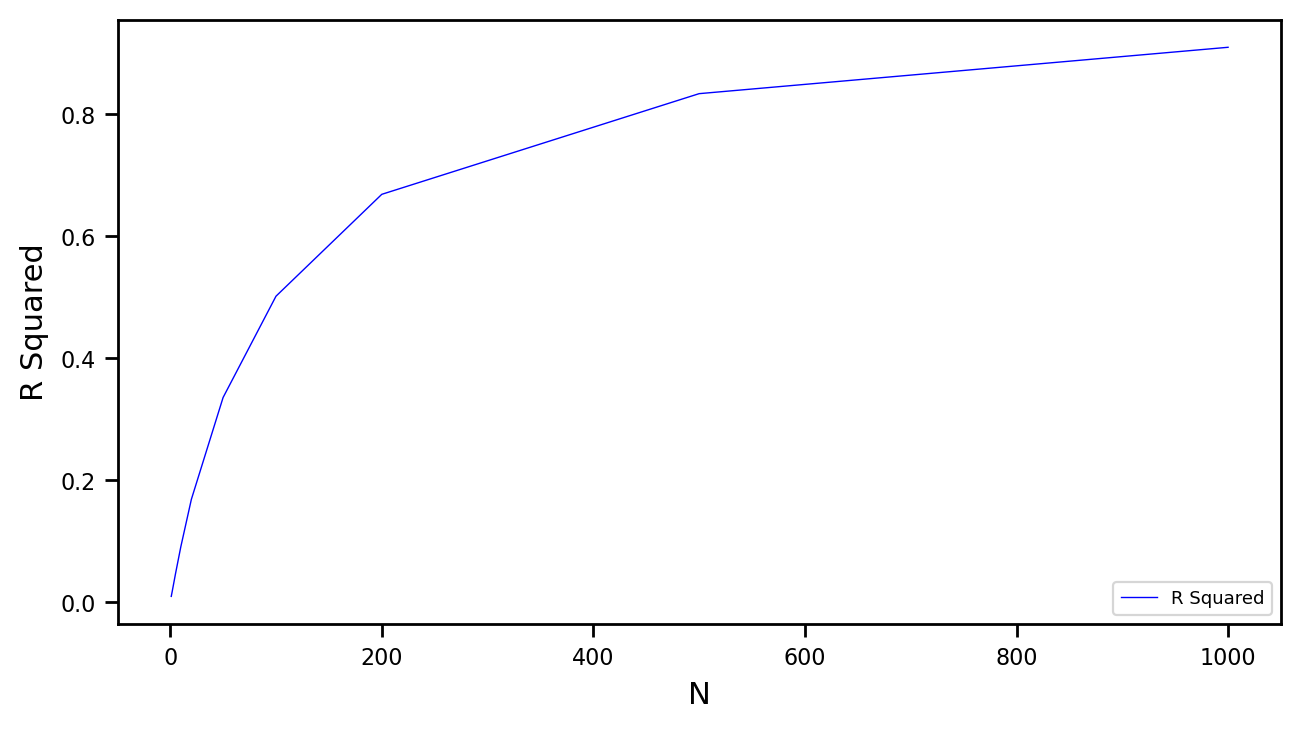

In [74]:
SampleBigDataVVVdf = BigDataVVVdf.iloc[0:10, [0,3]]
SampleBigDataVVVdf.columns = ['N', 'R Squared'] 

print('########################################################################')
print('Plot of Values = R Squared, for Volumes = N, and Veracity set to r = .01')
print('########################################################################')

# Uncomment to see values
# print(SampleBigDataVVVdf)

# Plot creation
s = sns.set_context("paper")

plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('axes', titlesize=11)  # fontsize of the figure title
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize

fig, ax = plt.subplots(figsize=(7.5,4), dpi=200, facecolor='w')

lin1 = ax.plot('N', 'R Squared', data=SampleBigDataVVVdf,color="blue", linewidth=.5 )

plt.legend(loc="lower right", prop={'size': 6.5})
ax.set_xlabel('N')
ax.set_ylabel('R Squared')

Text(0, 0.5, 'R Squared')

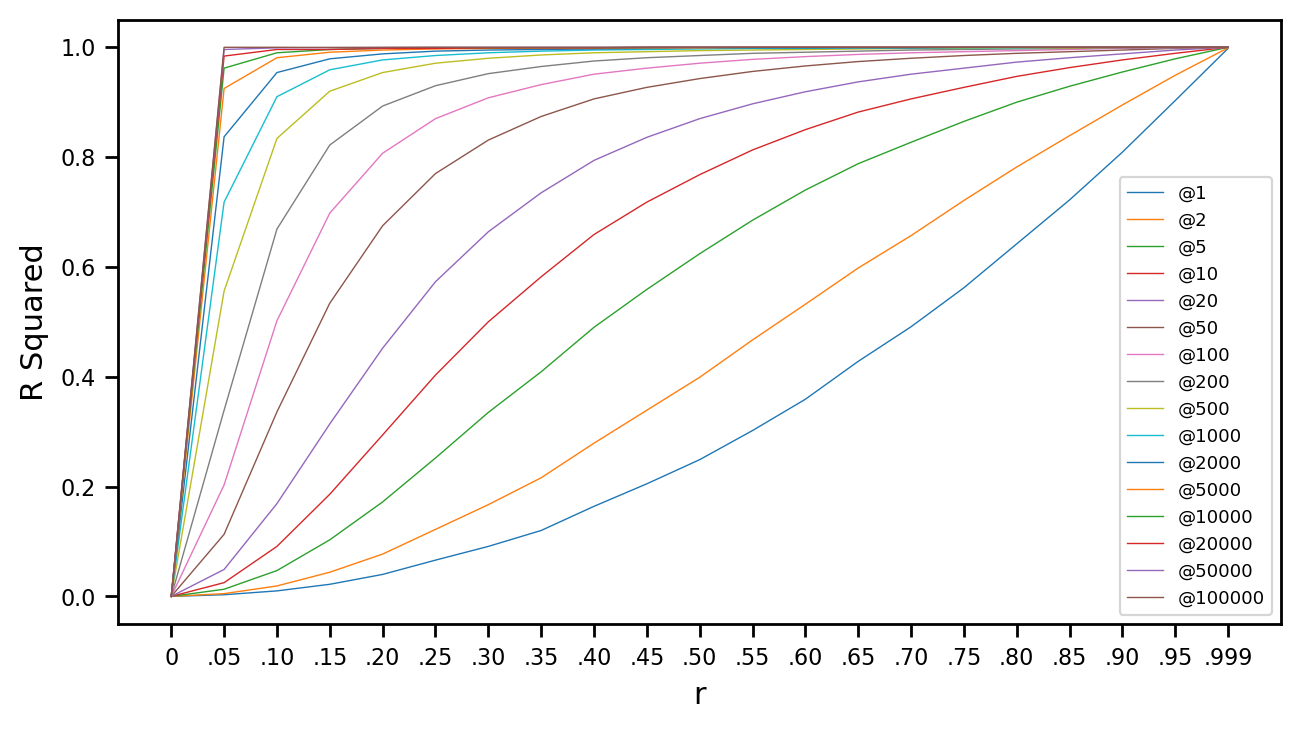

In [53]:
# Plot creation
s = sns.set_context("paper")

plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('axes', titlesize=11)  # fontsize of the figure title
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize

fig, ax = plt.subplots(figsize=(7.5,4), dpi=200, facecolor='w')
RCount = 0
for idx, row in BigDataVVVdf.iterrows():
    #print(idx, row)
    VarLabel = '@' + row[0].astype(int).astype(str)
    Vardf = pd.DataFrame()
    Vardf['RSquare'] = row
    Vardf = Vardf.iloc[1:,:]
    Vardf.reset_index(inplace=True)
    Vardf.columns = ['r', VarLabel ]
    _ = ax.plot('r', VarLabel, data=Vardf, linewidth=.5 )
    RCount = RCount + 1
plt.legend(loc="lower right", prop={'size': 6.5})
ax.set_xlabel('r')
ax.set_ylabel('R Squared')

### Diminishing Returns in Value from Increasing Volume and Veracity

Both volume and veracity have diminishing returns in value creation.  The reasons for this will be discussed.

Lets look at the returns from increasing volume first.  It might not be apparent at first from looking at the plot shown above, but the returns in value from increasing volumn rapidly diminish.  The visual disconnect is due to the fact that I am using a modified logrithmic scale for increasing the numbers of variables (volume).

because I have 
The analyses turned out to be informative.  One finding was that inter-correlation has big effects on model accuracy.

The first SPSS example I used for building correlated variables had a factor analysis included.  I found that using the factor analyses, and creating factor variables from the correlated variables, I could create a smaller subset of correlated variables with no inter-correlation.  When I did this, I found that the R Squared = 1.000 was easy to achieve with only a few variables.  This model is replicated in an easier fashion using the Cholesky Decomposition.  Factor analyses could be used to produce the same results.

The second set of analyses involved creating varying numbers of variables that had varying r values.  In this case, inter-correlation occurred naturally.  The r(x,y) values ranged from .05 to .999.  These analyses indicate that the R Squared increases quickly at first as more variables are added to the OLS regression model and then the gains from adding more variables start to drop rapidly.

For example, it would take 90,000 variables with r(x,y) to achieve an R Squared of 1.000.  The (r, N, R Squared) plot I generated so far is included.  I think that I may have to redo some calculations since it seems that the R Squared values from SPSS are higher than the R Squared values I get from Python.  

I could also put this in an automated loop to get the values.  Note however, that trying to run these models with over 50,000 variables is extremely RAM intensive and time consuming.  I had to bump up my RAM to 128GB and it still took about a week for some of these calculations to finish when the variable count got up to 100,000.

I probably need to add some sections to look at what the inter-correlation levels are for each r(x,y).  I also don't like the look of the plot.  Excel has a smoothing function that reduces the granularity.

## Using the Cholesky Decomposition to create correlation matrices

One of the interesting findings that came out of these analyses was the fact that the R Squared values for a model in which there is no inter-correlation between variables is simply additive.  For example, the R Squared for an individual variable with r(x,y) = .5 is simply .5 * .5 = .25.  Then, the R Squared value for the linear regression model with 4 variables with r(x,y) = .5 is 1.000.  It is then an easy process to compute the R Squared for any number of variables where the r(x,y) is known for the predictors.

One might ask where this is useful.  One can create completely uncorrelated predictors using factor analysis on the variables with inter-correlation.  In that case, the model size can be substantially reduced.

I have set up the Python code to create the randomly correlated variables with no inter-correlation for the case r(x,y) = .5.  This uses a Cholesky Decomposition.  Note that the R Squared cannot = 1 exactly because the program crashes in that case.  One of the variables must have a value slightly less than r(x,y) = .5.

### First create a 5x5 dataframe with r(x,y) = .5 for y to X(1-4), and all X-X correlations = 0. 

In [2]:
# Set up the correlation matrix
# Note that the Cholesky Decomposition will not let all correlations be r = .500 so one was .4999999
corr_mat= np.array([[ 1, .5, .5, .5, .4999999],
                    [.5, 1, 0, 0, 0],
                    [.5, 0, 1, 0, 0],
                    [.5, 0, 0, 1, 0],
                    [.4999999, 0, 0, 0, 1]])

# Compute the (upper) Cholesky decomposition matrix
upper_chol = cholesky(corr_mat)

# Generate 5 sets of 1,000,000 normally distributed (Gaussian) numbers with mean = 0, stdDev = 1.
rnd = np.random.normal(0.0, 1.0, size=(10**7, 5))

# Finally, compute the inner product of upper_chol and rnd
Choleskydf = pd.DataFrame(rnd @ upper_chol)
Choleskydf.columns = ['Y', 'X1', 'X2', 'X3', 'X4']
X = Choleskydf.iloc[0:10**7,1:5] ## X usually means our input variables (or independent variables)
y = Choleskydf["Y"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
Choleskydf.describe()

,Y,X1,X2,X3,X4
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,-8.666446e-04,-3.813652e-04,-4.247753e-04,-4.972398e-04,-4.298359e-04
std,1.000186e+00,9.999742e-01,9.999785e-01,1.000131e+00,1.000139e+00
min,-5.418373e+00,-5.279147e+00,-5.417696e+00,-5.249906e+00,-5.833919e+00
25%,-6.754024e-01,-6.748289e-01,-6.748330e-01,-6.751451e-01,-6.747306e-01
50%,-7.985101e-04,-3.640166e-04,-4.732312e-04,-5.527088e-04,-1.937587e-04
75%,6.737244e-01,6.740128e-01,6.740528e-01,6.740563e-01,6.739718e-01
max,4.926834e+00,5.382719e+00,5.257559e+00,5.060774e+00,5.343523e+00


### Check the correlation matrix generated by the Choleky Decomposition

In [3]:
# Run the correlation matrix.  Note that there is random error
corrMatrix = Choleskydf.corr()
print (corrMatrix)

           Y        X1        X2        X3        X4
Y   1.000000  0.500119  0.499542  0.500473  0.500127
X1  0.500119  1.000000 -0.000369  0.000685  0.000135
X2  0.499542 -0.000369  1.000000 -0.000094 -0.000246
X3  0.500473  0.000685 -0.000094  1.000000  0.000411
X4  0.500127  0.000135 -0.000246  0.000411  1.000000


### Run the Statsmodel linear regression and get R Squared = .999999

In [4]:
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
print('R Squared = ' + str(model.rsquared))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.499e+13
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:12:06   Log-Likelihood:             6.6398e+07
No. Observations:            10000000   AIC:                        -1.328e+08
Df Residuals:                 9999995   BIC:                        -1.328e+08
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.655e-08      1e-07     -0.365      0.7

## Create correlated variables without controlling the intercorrelations between the variables

In this section I created randomly correlated variables without controlling for inter-correlation.  The intercorrelation occurs naturally.  When the variables are inter-correlated, the R Squared does not increase linearly with the addition of more variables.  One can get large gains in accuracy at first, but then the OLS model has diminishing returns. At r(x,y) = .05, it can take 90,000 variables to achieve an R Squared = 1.000 (R Squared > .99999).

Note that if I replicate the model with no inter-correlation shown above, with r(x,y) = .5, and N = 4, the inter-correlation is approximately r(x,x) = .25. 

### Manually set up the correlation coefficient and number of columns to calculate the R Squared for

This is where r(x,y) and N are set up. Change r (corr) and N (NumberOfColumns).  You can leave the mean, sd, and NumberOfRows as they are.

In [9]:
# Leave these alone
mean = 0
sd = 1
NumberOfRows = 100000

# Change these values to your own choices
corr = .2
NumberOfColumns = 1000

print('Correlation = ' + str(corr))
print('Number Of Columns = ' + str(NumberOfColumns))

Correlation = 0.2
Number Of Columns = 1000


This is a test to generate a correlation matrix and get a sense of the inter-correlation levels for r(x,x).

In [6]:
# This is just a test for determining inter-correlation
# Calculate y for the mean, standard deviation, and number of rows
y = np.random.normal(mean, sd, NumberOfRows)

# Convert y to a dataframe and call it 'Y'
df=pd.DataFrame(y, columns=list('Y'))

# Add correlated variables to the dataframe equal to the number of columns
for n in range(0,NumberOfColumns):
    x = np.random.normal(mean, sd, NumberOfRows)
    nchar = 'r' + str(n+1)
    df[nchar] = df['Y'] * corr + x * np.sqrt(1-corr**2)
    
# print(df.head())
print('df Shape: ' + str(df.shape))

# Run the correlation matrix.  Note that there is random error
corrMatrix = df.corr()
print (corrMatrix)

df Shape: (100000, 11)
            Y        r1        r2        r3        r4        r5        r6  \
Y    1.000000  0.202805  0.201294  0.201082  0.203631  0.204692  0.196409   
r1   0.202805  1.000000  0.043818  0.044085  0.040520  0.037930  0.040550   
r2   0.201294  0.043818  1.000000  0.042050  0.041247  0.043439  0.037238   
r3   0.201082  0.044085  0.042050  1.000000  0.043965  0.033019  0.041184   
r4   0.203631  0.040520  0.041247  0.043965  1.000000  0.045297  0.039356   
r5   0.204692  0.037930  0.043439  0.033019  0.045297  1.000000  0.038006   
r6   0.196409  0.040550  0.037238  0.041184  0.039356  0.038006  1.000000   
r7   0.194281  0.033611  0.035441  0.040922  0.040226  0.035173  0.041165   
r8   0.202870  0.037808  0.042480  0.045021  0.041566  0.044012  0.037036   
r9   0.198194  0.042485  0.035554  0.041226  0.040496  0.038014  0.033278   
r10  0.199288  0.042983  0.037103  0.041945  0.042922  0.038591  0.031837   

           r7        r8        r9       r10  
Y    0

### Calculate the R Squared Value for the correlation and variable combination

This is the loop that calculates the R Squared values for your chosen r and N values.

In [10]:
# Calculate y for the mean, standard deviation, and number of rows
y = np.random.normal(mean, sd, NumberOfRows)

# Convert y to a dataframe and call it 'Y'
df=pd.DataFrame(y, columns=list('Y'))

# Add correlated variables to the dataframe equal to the number of columns
for n in range(0,NumberOfColumns):
    x = np.random.normal(mean, sd, NumberOfRows)
    nchar = 'r' + str(n+1)
    df[nchar] = df['Y'] * corr + x * np.sqrt(1-corr**2)
    
# print(df.head())
print('df Shape: ' + str(df.shape))

# Set up the variables
X = df.iloc[0:NumberOfRows,1:NumberOfColumns] ## X usually means our input variables (or independent variables)
y = df["Y"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

print('X Shape: ' + str(X.shape))

# This step clears the large dataframe from memory to free up space for other applications
df=pd.DataFrame(y, columns=list('Y'))

print('df Shape after clearing: ' + str(df.shape))

# print(df.info(memory_usage="deep"))

# import psutil
# psutil.virtual_memory()

regressor = LinearRegression() # Creating a regressor
regressor.fit(X,y) # Fitting the dataset into the model

y_pred = regressor.predict(X)

print('Mean squared Error: %.5f' %  mean_squared_error(y,y_pred)) # Priniting the mean error
print('R2 score: %.6f' % r2_score(y,y_pred)) # Priniting R2 Score

df Shape: (100000, 1001)
X Shape: (100000, 1000)
df Shape after clearing: (100000, 1)
Mean squared Error: 0.02317
R2 score: 0.976846


### Statsmodel version (Note: Statsmodel crashes with large models)

I like the extra infromtion the Statsmodel generates.  However, it crashes for large N.

In [11]:
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
print('R Squared = ' + str(model.rsquared))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4181.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:14:31   Log-Likelihood:                 46359.
No. Observations:              100000   AIC:                        -9.072e+04
Df Residuals:                   99000   BIC:                        -8.120e+04
Df Model:                         999                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.099      0.2

Here is the data I have collected so far.  Python does not agree with SPSS so I might have to regenerate some of thes results.